In [ ]:
!pip install ipywidgets matplotlib


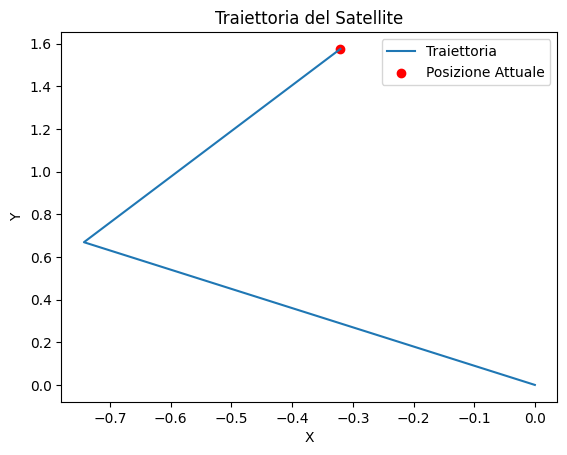

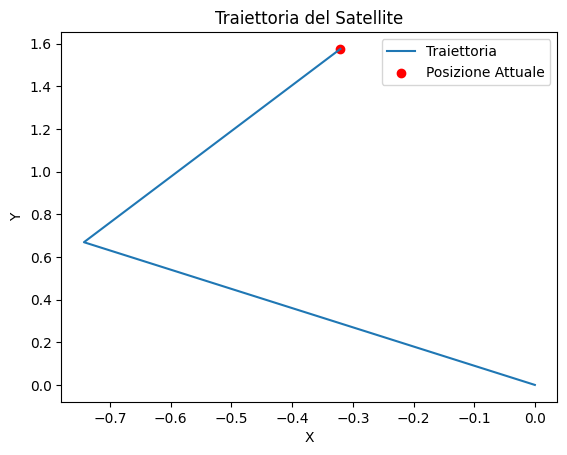

In [ ]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output

# Funzione per aggiornare lo stato dei sistemi
def update_status(change):
    system_status.value = f"""
    **Sistema di Comunicazione:** {comm_status.value}
    **Sistema di Navigazione:** {nav_status.value}
    **Energia Rimanente:** {energy_bar.value}%
    **Orientamento (gradi):** {orientation_slider.value}
    """
    update_trajectory()

# Funzione per aggiornare la traiettoria del satellite
def update_trajectory():
    clear_output(wait=True)
    fig, ax = plt.subplots()
    ax.plot(traj_x, traj_y, label='Traiettoria')
    ax.scatter(current_pos[0], current_pos[1], color='red', label='Posizione Attuale')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Traiettoria del Satellite')
    ax.legend()
    display(fig)
    display(layout)

# Funzione per calibrare i sensori
def calibrate_sensors(b):
    system_status.value = "**Calibrazione dei sensori in corso...**"
    # Simulazione del tempo di calibrazione
    import time
    time.sleep(2)
    system_status.value = "**Sensori calibrati con successo!**"
    update_status(None)

# Funzione per attivare il motore principale
def activate_engine(b):
    system_status.value = "**Motore principale attivato!**"
    # Simulazione del tempo di attivazione del motore
    import time
    time.sleep(2)
    energy_bar.value -= 10
    # Aggiorna la posizione del satellite
    global current_pos
    current_pos[0] += np.cos(np.radians(orientation_slider.value))
    current_pos[1] += np.sin(np.radians(orientation_slider.value))
    traj_x.append(current_pos[0])
    traj_y.append(current_pos[1])
    update_status(None)

# Elementi dell'interfaccia utente
comm_status = widgets.ToggleButtons(
    options=['Operativo', 'Non Operativo'],
    description='Comunicazione:',
    disabled=False,
    button_style=''
)

nav_status = widgets.ToggleButtons(
    options=['Operativo', 'Non Operativo'],
    description='Navigazione:',
    disabled=False,
    button_style=''
)

energy_bar = widgets.FloatProgress(
    value=75,
    min=0,
    max=100,
    step=1,
    description='Energia:',
    bar_style='info',
    orientation='horizontal'
)

orientation_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=360,
    step=1,
    description='Orientamento:',
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

calibrate_button = widgets.Button(
    description='Calibra Sensori',
    button_style='success',
    tooltip='Calibra i sensori del satellite'
)

activate_engine_button = widgets.Button(
    description='Attiva Motore Principale',
    button_style='warning',
    tooltip='Attiva il motore principale del satellite'
)

# Display per lo stato del satellite
system_status = widgets.HTML(value="")

# Layout
layout = widgets.VBox([
    comm_status,
    nav_status,
    energy_bar,
    orientation_slider,
    calibrate_button,
    activate_engine_button,
    system_status
])

# Eventi
comm_status.observe(update_status, 'value')
nav_status.observe(update_status, 'value')
energy_bar.observe(update_status, 'value')
orientation_slider.observe(update_status, 'value')

calibrate_button.on_click(calibrate_sensors)
activate_engine_button.on_click(activate_engine)

# Inizializzazione della traiettoria
traj_x = [0]
traj_y = [0]
current_pos = [0, 0]

# Visualizzazione dell'interfaccia utente
display(layout)

# Aggiornamento iniziale dello stato e della traiettoria
update_status(None)
